In [32]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

KAYNAK===>biruni.tuik.gov.tr

İndirilen dosya önce Excel ile temizlendi

In [23]:
data = pd.read_csv("Tüketici_Fiyat_Endeksi.csv", sep = ";", index_col= (0,1))
data

Gıda  Alkolsüz İçecekler  Giyim Ve Ayakkabı  \
Yıl  Ay                                                        
2004 Aralık    100.00              100.00             100.00   
2005 Ocak      111.72              115.23             110.77   
     Şubat     112.75              115.28             103.13   
     Mart      112.85              115.51              99.69   
     Nisan     111.65              116.05             108.26   
...               ...                 ...                ...   
2022 Haziran  1320.75              976.14             362.89   
     Temmuz   1359.64             1036.27             369.42   
     Ağustos  1366.60             1095.11             374.15   
     Eylül    1393.47             1117.46             379.63   
     Ekim     1466.74             1149.24             411.28   

              Konut, Su, Elektrik, Gaz Ve Diğer Yakıtlar  Gerçek Kira  \
Yıl  Ay                                                                 
2004 Aralık                                       100.00       100.00   
2005 Ocak                                         115.51       133.14   
     Şubat                                        116.11       134.79   
     Mart                                         117.37       136.23   
     Nisan                                        117.82       137.22   
...                                                  ...          ...   
2022 Haziran                                     1004.50       737.75   
     Temmuz                                      1024.47       769.01   
     Ağustos                                     1045.50       802.85   
     Eylül                                       1149.98       846.58   
     Ekim                                        1179.49       887.82   

              Su (Şebeke Suyu) Ve Konutla İlgili Çeşitli Hizmetler  \
Yıl  Ay                                                              
2004 Aralık                                              100.00      
2005 Ocak                                                111.00      
     Şubat                                               110.82      
     Mart                                                111.06      
     Nisan                                               105.29      
...                                                         ...      
2022 Haziran                                             720.17      
     Temmuz                                              753.99      
     Ağustos                                             774.74      
     Eylül                                               828.62      
     Ekim                                                888.01      

              Mobilya, Mefruşat, Halı Ve Diğer Yer Döşemeleri  Sağlık  \
Yıl  Ay                                                                 
2004 Aralık                                            100.00  100.00   
2005 Ocak                                              125.43  112.84   
     Şubat                                             126.75  112.38   
     Mart                                              126.00  113.38   
     Nisan                                             127.15  114.17   
...                                                       ...     ...   
2022 Haziran                                          1114.88  476.98   
     Temmuz                                           1151.07  510.26   
     Ağustos                                          1161.60  546.03   
     Eylül                                            1159.64  557.49   
     Ekim                                             1173.39  567.45   

              Ulaştırma Hizmetleri  Haberleşme  Eğlence Ve Kültür  Eğitim  \
Yıl  Ay                                                                     
2004 Aralık                 100.00      100.00             100.00  100.00   
2005 Ocak                   123.80      103.99             113.37  130.87   
     Şubat                  124.22      104.17             113.07

In [26]:
cols = ["Gıda","İçecek","Giyim","Elektrik","Kira","Su","Mobilya","Sağlık","Ulaştırma","Haberleşme","Kültür","Eğitim","Kişisel Bakım","Sigorta"]
data.columns = cols
data.head()

Gıda  İçecek   Giyim  Elektrik    Kira      Su  Mobilya  \
Yıl  Ay                                                                  
2004 Aralık  100.00  100.00  100.00    100.00  100.00  100.00   100.00   
2005 Ocak    111.72  115.23  110.77    115.51  133.14  111.00   125.43   
     Şubat   112.75  115.28  103.13    116.11  134.79  110.82   126.75   
     Mart    112.85  115.51   99.69    117.37  136.23  111.06   126.00   
     Nisan   111.65  116.05  108.26    117.82  137.22  105.29   127.15   

             Sağlık  Ulaştırma  Haberleşme  Kültür  Eğitim  Kişisel Bakım  \
Yıl  Ay                                                                     
2004 Aralık  100.00     100.00      100.00  100.00  100.00         100.00   
2005 Ocak    112.84     123.80      103.99  113.37  130.87         112.81   
     Şubat   112.38     124.22      104.17  113.07  130.31         113.91   
     Mart    113.38     124.89      104.43  111.89  130.18         115.35   
     Nisan   114.17     125.28      104.19  111.00  130.06         116.16   

             Sigorta  
Yıl  Ay               
2004 Aralık   100.00  
2005 Ocak     127.14  
     Şubat    130.53  
     Mart     128.74  
     Nisan    123.83

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 215 entries, (2004, 'Aralık') to (2022, 'Ekim')
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gıda           215 non-null    float64
 1   İçecek         215 non-null    float64
 2   Giyim          215 non-null    float64
 3   Elektrik       215 non-null    float64
 4   Kira           215 non-null    float64
 5   Su             215 non-null    float64
 6   Mobilya        215 non-null    float64
 7   Sağlık         215 non-null    float64
 8   Ulaştırma      215 non-null    float64
 9   Haberleşme     215 non-null    float64
 10  Kültür         215 non-null    float64
 11  Eğitim         215 non-null    float64
 12  Kişisel Bakım  215 non-null    float64
 13  Sigorta        215 non-null    float64
dtypes: float64(14)
memory usage: 25.1+ KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gıda,215.0,336.342512,264.708964,100.00,167.465,244.14,391.715,1466.74
İçecek,215.0,277.478047,187.160451,100.00,160.060,208.29,333.360,1149.24
Giyim,215.0,176.695023,67.185772,97.33,121.715,156.23,222.385,411.28
Elektrik,215.0,320.005814,195.896140,100.00,196.200,267.16,376.940,1179.49
Kira,215.0,355.715953,154.856342,100.00,251.180,313.86,449.120,887.82
Su,215.0,265.835070,140.603080,100.00,161.450,226.74,348.825,888.01
Mobilya,215.0,281.804930,209.258734,100.00,150.430,208.75,332.135,1173.39
Sağlık,215.0,183.951163,93.579361,100.00,126.865,135.69,210.550,567.45
Ulaştırma,215.0,313.093535,187.610296,100.00,191.035,266.04,367.785,1158.57
Haberleşme,215.0,128.692372,24.033673,100.00,110.925,122.36,134.885,224.39


In [29]:
corr = data.corr()
corr

,Gıda,İçecek,Giyim,Elektrik,Kira,Su,Mobilya,Sağlık,Ulaştırma,Haberleşme,Kültür,Eğitim,Kişisel Bakım,Sigorta
Gıda,1.000000,0.993815,0.945293,0.993243,0.940998,0.968078,0.995827,0.988146,0.993469,0.978460,0.989972,0.961489,0.993644,0.973874
İçecek,0.993815,1.000000,0.949934,0.994328,0.946537,0.974680,0.992009,0.987861,0.996176,0.981686,0.990717,0.965155,0.992026,0.984840
Giyim,0.945293,0.949934,1.000000,0.962801,0.978625,0.968333,0.931680,0.951356,0.953093,0.978399,0.972200,0.984898,0.964985,0.941928
Elektrik,0.993243,0.994328,0.962801,1.000000,0.966334,0.983082,0.986002,0.984619,0.996542,0.989494,0.993739,0.978325,0.994102,0.977882
Kira,0.940998,0.946537,0.978625,0.966334,1.000000,0.974503,0.919656,0.949581,0.953133,0.980393,0.970897,0.993296,0.960572,0.933531
Su,0.968078,0.974680,0.968333,0.983082,0.974503,1.000000,0.955921,0.955097,0.981618,0.981454,0.977275,0.975060,0.969573,0.973737
Mobilya,0.995827,0.992009,0.931680,0.986002,0.919656,0.955921,1.000000,0.983543,0.988852,0.967765,0.982228,0.945552,0.987694,0.972790
Sağlık,0.988146,0.987861,0.951356,0.984619,0.949581,0.955097,0.983543,1.000000,0.980017,0.981210,0.992053,0.972811,0.994935,0.961405
Ulaştırma,0.993469,0.996176,0.953093,0.996542,0.953133,0.981618,0.988852,0.980017,1.000000,0.982883,0.988640,0.967583,0.989162,0.982719
Haberleşme,0.978460,0.981686,0.978399,0.989494,0.980393,0.981454,0.967765,0.981210,0.982883,1.000000,0.993447,0.991230,0.990230,0.969705


<AxesSubplot:>

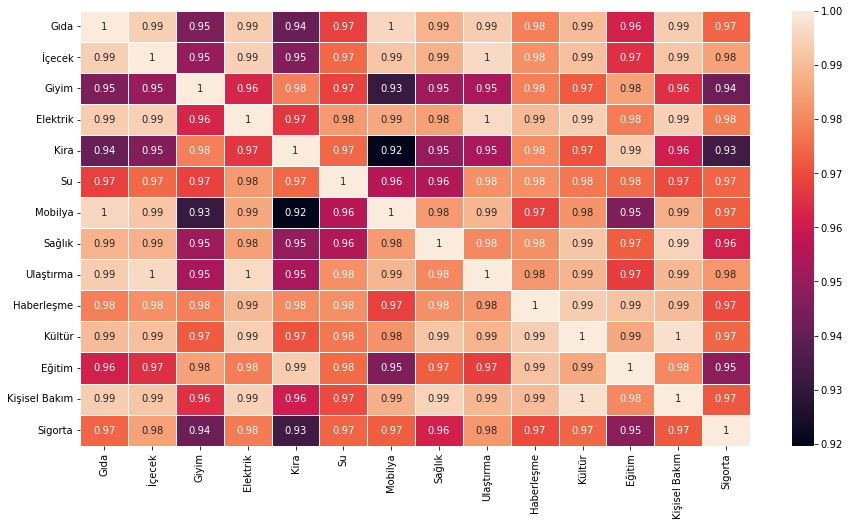

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), linewidths = 0.5, annot = True)

In [39]:
stack = corr.unstack()
stack.sort_values(kind = "quicksort", ascending = False)[10:20]

Kira           Kira             1.000000
Elektrik       Elektrik         1.000000
Giyim          Giyim            1.000000
Sigorta        Sigorta          1.000000
Kültür         Kişisel Bakım    0.997737
Kişisel Bakım  Kültür           0.997737
Elektrik       Ulaştırma        0.996542
Ulaştırma      Elektrik         0.996542
İçecek         Ulaştırma        0.996176
Ulaştırma      İçecek           0.996176
dtype: float64

In [40]:
stack.sort_values(kind = "quicksort", ascending = False).tail()

Kira     Sigorta    0.933531
Mobilya  Giyim      0.931680
Giyim    Mobilya    0.931680
Mobilya  Kira       0.919656
Kira     Mobilya    0.919656
dtype: float64

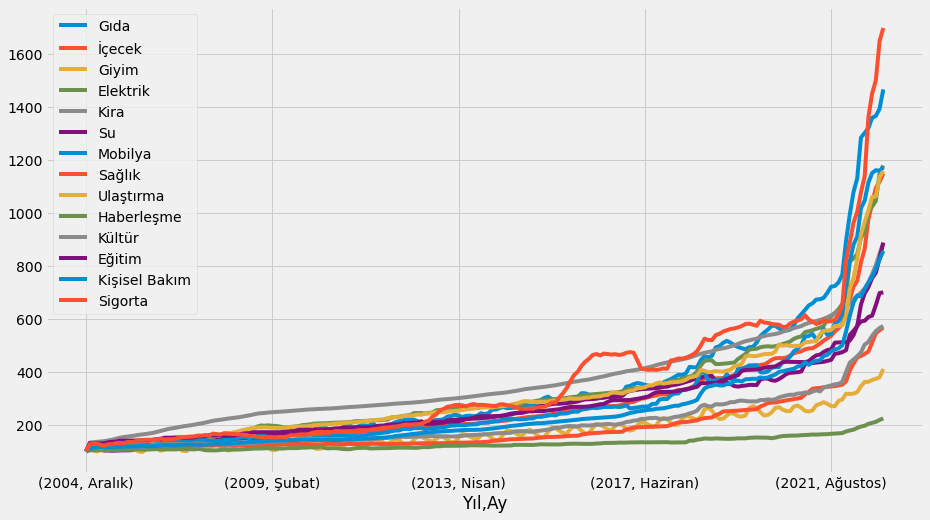

In [145]:
data.plot(figsize = (14,8));

### En Temel İhtiyaçlar

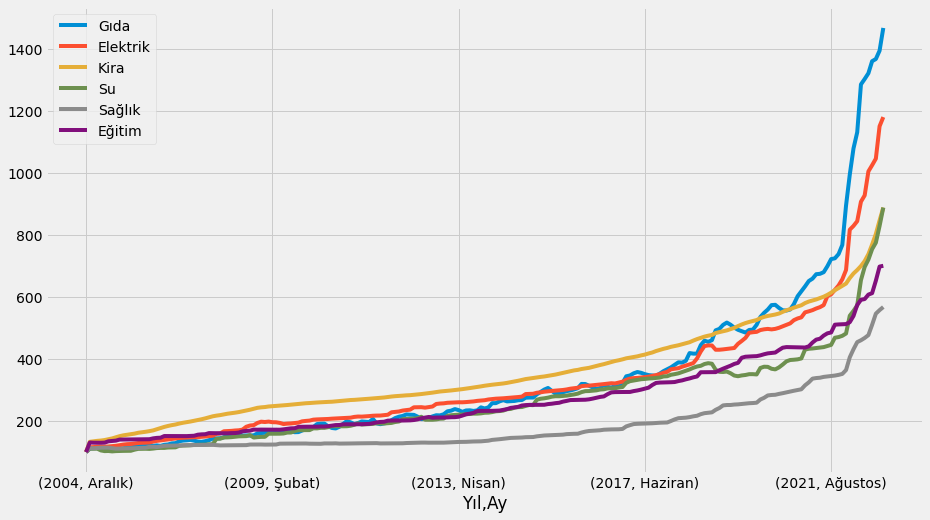

In [152]:
data_x = data[["Gıda","Elektrik","Kira","Su","Sağlık","Eğitim"]]
data_x.plot(figsize = (14,8));

## Time Series

In [80]:
data2 = pd.read_csv("Tüketici_Fiyat_Endeksi.csv", sep = ";")
data2

,Yıl,Ay,Gıda,Alkolsüz İçecekler,Giyim Ve Ayakkabı,"Konut, Su, Elektrik, Gaz Ve Diğer Yakıtlar",Gerçek Kira,Su (Şebeke Suyu) Ve Konutla İlgili Çeşitli Hizmetler,"Mobilya, Mefruşat, Halı Ve Diğer Yer Döşemeleri",Sağlık,Ulaştırma Hizmetleri,Haberleşme,Eğlence Ve Kültür,Eğitim,Kişisel Bakım,Sigorta
0,2004,Aralık,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2005,Ocak,111.72,115.23,110.77,115.51,133.14,111.00,125.43,112.84,123.80,103.99,113.37,130.87,112.81,127.14
2,2005,Şubat,112.75,115.28,103.13,116.11,134.79,110.82,126.75,112.38,124.22,104.17,113.07,130.31,113.91,130.53
3,2005,Mart,112.85,115.51,99.69,117.37,136.23,111.06,126.00,113.38,124.89,104.43,111.89,130.18,115.35,128.74
4,2005,Nisan,111.65,116.05,108.26,117.82,137.22,105.29,127.15,114.17,125.28,104.19,111.00,130.06,116.16,123.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2022,Haziran,1320.75,976.14,362.89,1004.50,737.75,720.17,1114.88,476.98,1009.96,203.94,513.25,607.51,737.36,1361.38
211,2022,Temmuz,1359.64,1036.27,369.42,1024.47,769.01,753.99,1151.07,510.26,1060.61,207.56,536.34,612.13,759.17,1451.24
212,2022,Ağustos,1366.60,1095.11,374.15,1045.50,802.85,774.74,1161.60,546.03,1062.30,211.52,554.23,652.23,789.45,1500.68
213,2022,Eylül,1393.47,1117.46,379.63,1149.98,846.58,828.62,1159.64,557.49,1136.18,218.71,566.04,697.79,824.69,1649.05


In [81]:
cols = ["Yıl","Ay","Gıda","İçecek","Giyim","Elektrik","Kira","Su","Mobilya","Sağlık","Ulaştırma","Haberleşme","Kültür","Eğitim","Kişisel Bakım","Sigorta"]
data2.columns = cols
data2.head()

,Yıl,Ay,Gıda,İçecek,Giyim,Elektrik,Kira,Su,Mobilya,Sağlık,Ulaştırma,Haberleşme,Kültür,Eğitim,Kişisel Bakım,Sigorta
0,2004,Aralık,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,2005,Ocak,111.72,115.23,110.77,115.51,133.14,111.00,125.43,112.84,123.80,103.99,113.37,130.87,112.81,127.14
2,2005,Şubat,112.75,115.28,103.13,116.11,134.79,110.82,126.75,112.38,124.22,104.17,113.07,130.31,113.91,130.53
3,2005,Mart,112.85,115.51,99.69,117.37,136.23,111.06,126.00,113.38,124.89,104.43,111.89,130.18,115.35,128.74
4,2005,Nisan,111.65,116.05,108.26,117.82,137.22,105.29,127.15,114.17,125.28,104.19,111.00,130.06,116.16,123.83


In [82]:
df = data2[["Yıl","Ay","Elektrik"]]
df

,Yıl,Ay,Elektrik
0,2004,Aralık,100.00
1,2005,Ocak,115.51
2,2005,Şubat,116.11
3,2005,Mart,117.37
4,2005,Nisan,117.82
...,...,...,...
210,2022,Haziran,1004.50
211,2022,Temmuz,1024.47
212,2022,Ağustos,1045.50
213,2022,Eylül,1149.98


In [83]:
aylar = []
def aycevir(x):
    for i in x:
        if i == "Ocak":
            aylar.append(1)
        elif i == "Şubat":
            aylar.append(2)
        elif i == "Mart":
            aylar.append(3)
        elif i == "Nisan":
            aylar.append(4)
        elif i == "Mayıs":
            aylar.append(5)
        elif i == "Haziran":
            aylar.append(6)
        elif i == "Temmuz":
            aylar.append(7)
        elif i == "Ağustos":
            aylar.append(8)
        elif i == "Eylül":
            aylar.append(9)
        elif i == "Ekim":
            aylar.append(10)
        elif i == "Kasım":
            aylar.append(11)
        elif i == "Aralık":
            aylar.append(12)
            

In [84]:
ay = df["Ay"]
ay[0:5]

0    Aralık
1      Ocak
2     Şubat
3      Mart
4     Nisan
Name: Ay, dtype: object

In [85]:
aycevir(ay)
aylar[0:5]

[12, 1, 2, 3, 4]

In [87]:
df["Ay"] = aylar
df.head()

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_9704\2013049293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ay"] = aylar


,Yıl,Ay,Elektrik
0,2004,12,100.00
1,2005,1,115.51
2,2005,2,116.11
3,2005,3,117.37
4,2005,4,117.82


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yıl       215 non-null    int64  
 1   Ay        215 non-null    int64  
 2   Elektrik  215 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.2 KB


In [109]:
import datetime

def date_mapping(row):
    return datetime.date(int(row["Yıl"]), int(row["Ay"]), 1)

In [112]:
df["Tarih"] = df.apply(lambda x: date_mapping(x), axis = 1)
df_sub = df[["Tarih","Elektrik"]].reset_index(drop = True)
df_sub.head()

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_9704\4243272342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tarih"] = df.apply(lambda x: date_mapping(x), axis = 1)


,Tarih,Elektrik
0,2004-12-01,100.00
1,2005-01-01,115.51
2,2005-02-01,116.11
3,2005-03-01,117.37
4,2005-04-01,117.82


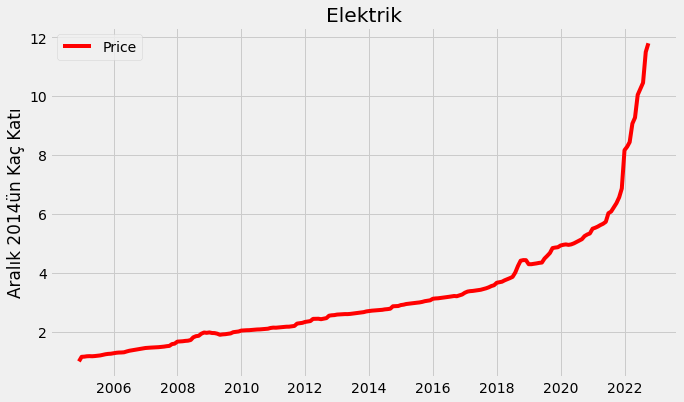

In [138]:
fig = plt.figure(figsize = (10,6))
plt.style.use("fivethirtyeight")
plt.plot(df_sub["Tarih"], df_sub["Elektrik"]/100, color = "red")
plt.legend(["Price"])
plt.title("Elektrik")
plt.ylabel("Aralık 2014ün Kaç Katı")
plt.yticks()
plt.show()

## Prophet Predictions

In [155]:
!pip install prophet

  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [158]:
import prophet

In [159]:
df_sub.columns = ["ds", "y"]

In [160]:
df_sub

,ds,y
0,2004-12-01,100.00
1,2005-01-01,115.51
2,2005-02-01,116.11
3,2005-03-01,117.37
4,2005-04-01,117.82
...,...,...
210,2022-06-01,1004.50
211,2022-07-01,1024.47
212,2022-08-01,1045.50
213,2022-09-01,1149.98


In [173]:
m = prophet.Prophet(seasonality_mode = "multiplicative", 
            interval_width = 0.95,
            mcmc_samples = 300)

m = m.fit(df_sub)
future = m.make_future_dataframe(periods = 120, freq = "M")
fcst = m.predict(future)
fcst

17:23:22 - cmdstanpy - INFO - CmdStan installation C:\Anaconda\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:23:22 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:23:22 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:23:27 - cmdstanpy - INFO - CmdStan done processing.
17:23:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2004-12-01,106.534292,6.649240,205.729578,82.704512,131.140947,-0.032921,-0.124123,0.061396,-0.032921,-0.124123,0.061396,0.0,0.0,0.0,103.027115
1,2005-01-01,108.034050,6.772908,218.136222,84.721660,131.712138,0.024707,-0.082736,0.130325,0.024707,-0.082736,0.130325,0.0,0.0,0.0,110.703212
2,2005-02-01,109.533807,11.052798,216.804345,87.239270,131.684824,0.037938,-0.078502,0.155721,0.037938,-0.078502,0.155721,0.0,0.0,0.0,113.689281
3,2005-03-01,110.888427,10.200788,210.865964,89.027117,132.406757,-0.006592,-0.071836,0.058262,-0.006592,-0.071836,0.058262,0.0,0.0,0.0,110.157481
4,2005-04-01,112.388185,16.671817,213.702984,91.297305,133.197542,0.012802,-0.060473,0.080080,0.012802,-0.060473,0.080080,0.0,0.0,0.0,113.827008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2032-05-31,2103.763626,1560.040520,2655.847233,1696.634880,2521.288532,-0.007467,-0.162470,0.150262,-0.007467,-0.162470,0.150262,0.0,0.0,0.0,2088.054663
331,2032-06-30,2114.378916,1613.618686,2706.940633,1705.473216,2536.286611,0.010737,-0.158198,0.182873,0.010737,-0.158198,0.182873,0.0,0.0,0.0,2137.080138
332,2032-07-31,2125.348049,1633.783589,2693.426791,1712.067830,2553.283857,0.014259,-0.149681,0.183551,0.014259,-0.149681,0.183551,0.0,0.0,0.0,2155.652707
333,2032-08-31,2136.317182,1768.243114,2933.345659,1718.699047,2569.921826,0.092164,-0.060329,0.226444,0.092164,-0.060329,0.226444,0.0,0.0,0.0,2333.209782


In [174]:
fcst.sort_values("yhat")

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2004-12-01,106.534292,6.649240,205.729578,82.704512,131.140947,-0.032921,-0.124123,0.061396,-0.032921,-0.124123,0.061396,0.0,0.0,0.0,103.027115
3,2005-03-01,110.888427,10.200788,210.865964,89.027117,132.406757,-0.006592,-0.071836,0.058262,-0.006592,-0.071836,0.058262,0.0,0.0,0.0,110.157481
1,2005-01-01,108.034050,6.772908,218.136222,84.721660,131.712138,0.024707,-0.082736,0.130325,0.024707,-0.082736,0.130325,0.0,0.0,0.0,110.703212
2,2005-02-01,109.533807,11.052798,216.804345,87.239270,131.684824,0.037938,-0.078502,0.155721,0.037938,-0.078502,0.155721,0.0,0.0,0.0,113.689281
4,2005-04-01,112.388185,16.671817,213.702984,91.297305,133.197542,0.012802,-0.060473,0.080080,0.012802,-0.060473,0.080080,0.0,0.0,0.0,113.827008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2031-08-31,2006.810643,1563.960844,2992.302330,1641.884326,2384.127980,0.124447,-0.170010,0.413968,0.124447,-0.170010,0.413968,0.0,0.0,0.0,2256.552850
310,2030-09-30,1888.273237,1706.584302,2968.090204,1569.798742,2228.520287,0.232363,-0.045701,0.513366,0.232363,-0.045701,0.513366,0.0,0.0,0.0,2327.038289
333,2032-08-31,2136.317182,1768.243114,2933.345659,1718.699047,2569.921826,0.092164,-0.060329,0.226444,0.092164,-0.060329,0.226444,0.0,0.0,0.0,2333.209782
334,2032-09-30,2146.932472,1909.211907,3101.372113,1725.288544,2585.519820,0.166867,0.006665,0.340535,0.166867,0.006665,0.340535,0.0,0.0,0.0,2505.185564


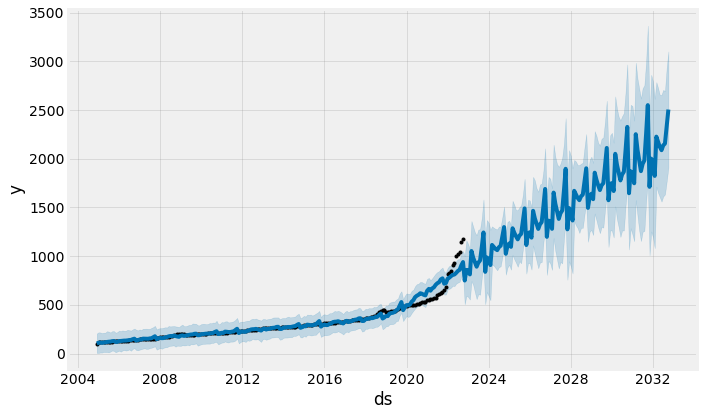

In [175]:
plt1 = m.plot(fcst)

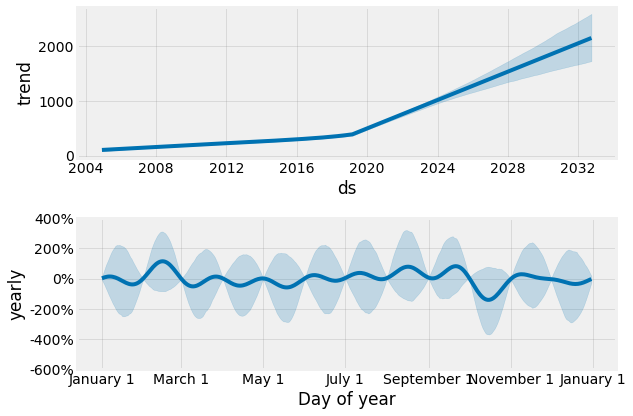

In [176]:
comps = m.plot_components(fcst)

In [179]:
preds = fcst.copy()
preds["Year"] = preds["ds"].apply(lambda x: x.year)
preds["Month"] = preds["ds"].apply(lambda x: x.month)

x = preds.loc[preds["Year"] == 2023]

In [182]:
x.T

,218,219,220,221,222,223,224,225,226,227,228,229
ds,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00
trend,897.866673,907.774277,918.74341,929.3587,940.327833,950.943123,961.912256,972.88139,983.49668,994.465813,1005.081103,1016.050236
yhat_lower,554.59278,744.40525,704.45121,630.731969,559.227458,609.847865,604.668967,781.439926,921.219341,506.83278,632.366371,590.458049
yhat_upper,1068.333288,1360.473365,1301.938371,1244.081058,1214.867453,1272.562307,1276.973808,1390.917185,1581.653158,1179.435984,1370.889901,1342.912721
trend_lower,847.890451,857.491589,867.479121,876.976455,887.15753,896.997359,906.541084,916.746236,926.251335,936.03035,945.590479,955.511354
trend_upper,944.991058,955.498437,967.211525,979.213744,990.196779,1001.74383,1014.00692,1026.394754,1038.460505,1051.244466,1063.991164,1076.2721
multiplicative_terms,-0.094915,0.159872,0.07111,0.011355,-0.051445,-0.018791,-0.006627,0.124447,0.264232,-0.156151,-0.018492,-0.04319
multiplicative_terms_lower,-0.357889,-0.167773,-0.229961,-0.31592,-0.373784,-0.342535,-0.35961,-0.17001,-0.0637,-0.483525,-0.36241,-0.398303
multiplicative_terms_upper,0.138167,0.48183,0.38378,0.326786,0.280827,0.326136,0.321021,0.413968,0.60031,0.162298,0.372875,0.26105
yearly,-0.094915,0.159872,0.07111,0.011355,-0.051445,-0.018791,-0.006627,0.124447,0.264232,-0.156151,-0.018492,-0.04319


2022 Ekim oranı 1179.49 /// 1 Kw Elektrik Fiyatı 1.73TL

In [194]:
tahmin2023 = x[["Year", "Month", "yhat_upper"]]
tahmin2023

,Year,Month,yhat_upper
218,2023,1,1068.333288
219,2023,2,1360.473365
220,2023,3,1301.938371
221,2023,4,1244.081058
222,2023,5,1214.867453
223,2023,6,1272.562307
224,2023,7,1276.973808
225,2023,8,1390.917185
226,2023,9,1581.653158
227,2023,10,1179.435984


In [184]:
oranlar = x["yhat_upper"]

218    1068.333288
219    1360.473365
220    1301.938371
221    1244.081058
222    1214.867453
223    1272.562307
224    1276.973808
225    1390.917185
226    1581.653158
227    1179.435984
228    1370.889901
229    1342.912721
Name: yhat_upper, dtype: float64

In [190]:
oranlar = x["yhat_upper"]
fiyatlar = []

def fiyat(y):
    for i in y:
        j = i*1.73/1179.49
        fiyatlar.append(round(j, ndigits = 2))

In [191]:
fiyat(oranlar)
fiyatlar

[1.57, 2.0, 1.91, 1.82, 1.78, 1.87, 1.87, 2.04, 2.32, 1.73, 2.01, 1.97]

In [195]:
tahmin2023["Tahmini_Fiyat"] = fiyatlar
tahmin2023

C:\Users\ogn_1\AppData\Local\Temp\ipykernel_9704\3185686619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tahmin2023["Tahmini_Fiyat"] = fiyatlar


,Year,Month,yhat_upper,Tahmini_Fiyat
218,2023,1,1068.333288,1.57
219,2023,2,1360.473365,2.00
220,2023,3,1301.938371,1.91
221,2023,4,1244.081058,1.82
222,2023,5,1214.867453,1.78
223,2023,6,1272.562307,1.87
224,2023,7,1276.973808,1.87
225,2023,8,1390.917185,2.04
226,2023,9,1581.653158,2.32
227,2023,10,1179.435984,1.73
